## CATEG-1

In [1]:
import datetime
import pandas as pd 
from statsmodels.tsa.statespace.sarimax import SARIMAX
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Importando as funções próprias de análise
from summary import print_type_info

In [2]:
filepath = "..\data\processed\CATEG_1.csv"
df = pd.read_csv(filepath).sort_values(by = ["DATE"])
df.head(3)

,DATE,UNITS_SOLD
510,2018-10-16,1
164,2019-06-11,27
514,2019-06-12,26


__Visualização dos dados__

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
type(df["DATE"][0])

str

In [5]:
# df['DATE'] = pd.to_datetime(df['DATE'])
df.index = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

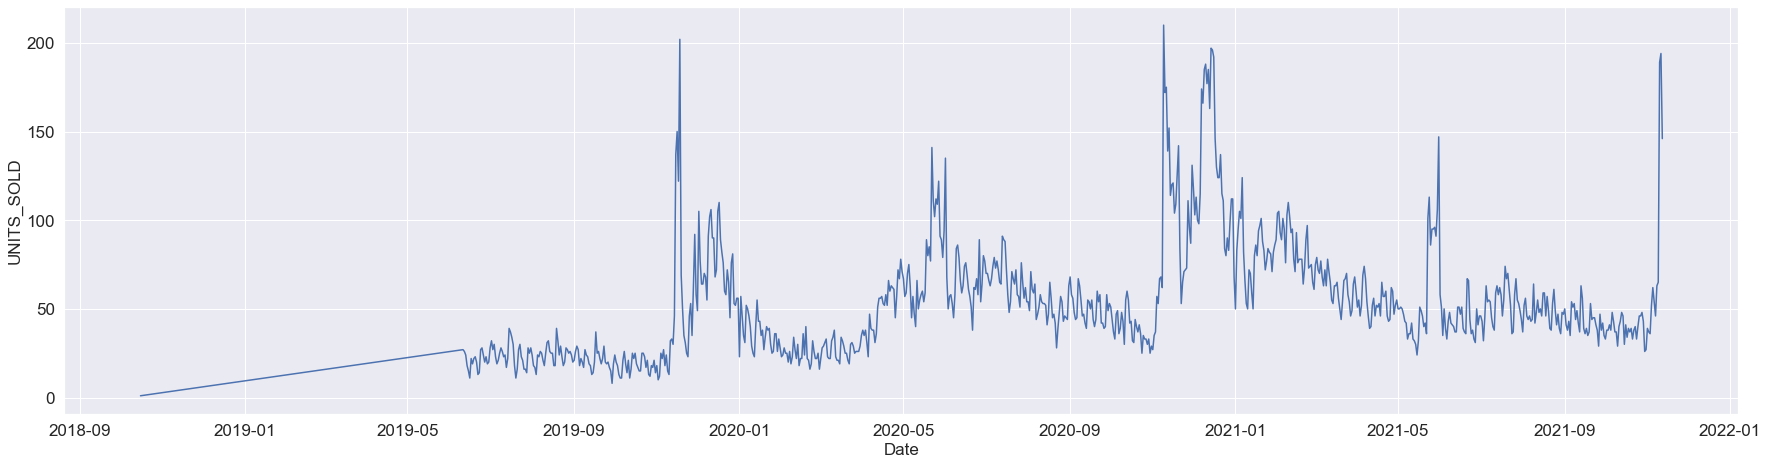

In [6]:
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
plt.xlabel('Date', fontsize=17)
plt.ylabel('UNITS_SOLD' , fontsize=17)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.plot(df.index, df['UNITS_SOLD'], )

In [7]:
df.index.min()

Timestamp('2018-10-16 00:00:00')

In [8]:
df.index.max()

Timestamp('2021-11-12 00:00:00')

In [9]:
df.index.max() - df.index.min()

Timedelta('1123 days 00:00:00')

In [10]:
len(df.index)

887

In [11]:
df_2008 = df[df.index < pd.to_datetime("2019-06-11", format='%Y-%m-%d')]
df_2008

,DATE,UNITS_SOLD
DATE,,
2018-10-16,2018-10-16,1


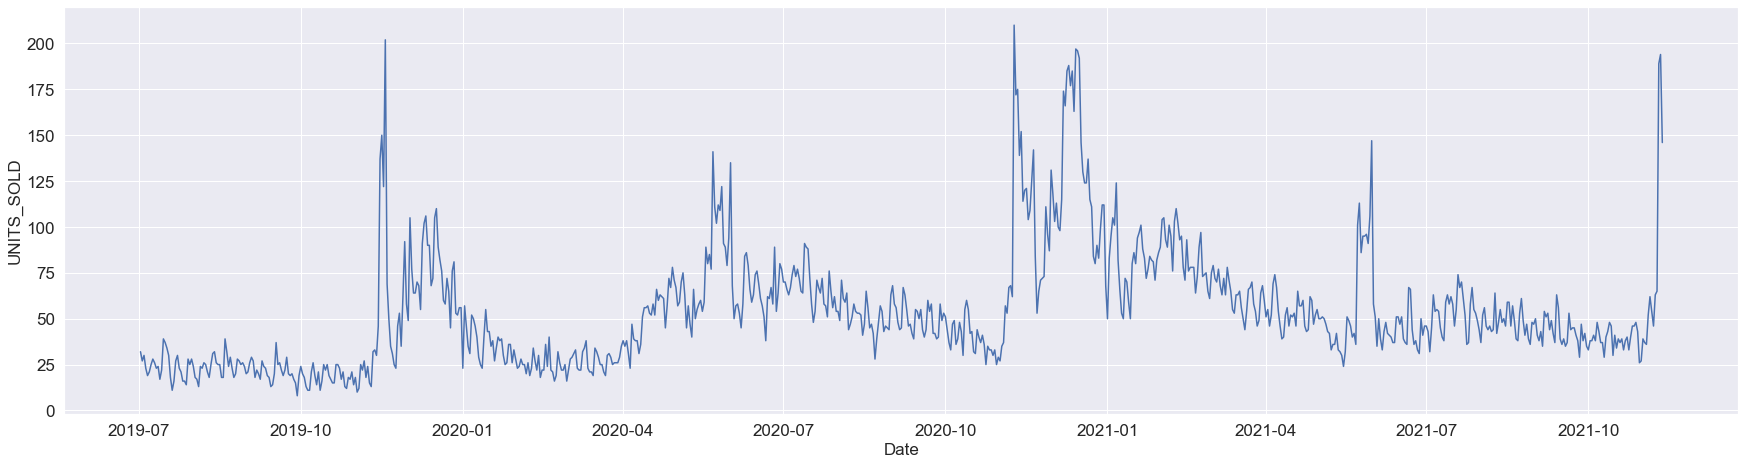

In [12]:
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
plt.xlabel('Date', fontsize=17)
plt.ylabel('UNITS_SOLD' , fontsize=17)
plt.xticks(rotation=0, fontsize=17)
plt.yticks(rotation=0, fontsize=17)
df = df[df.index > "2019-07-01"]

plt.plot(df.index, df['UNITS_SOLD'], )

- Como a previsão solicitada é de 3 semandas = 21 dias
- Os dados serão separados em 3 semanas para testes mais 3 semanas para validação = 42 dias
- O restante será utilizado para treinamento

In [13]:
len(df.index[-42:])

42

In [14]:
df.index[-42:-40]

DatetimeIndex(['2021-10-02', '2021-10-03'], dtype='datetime64[ns]', name='DATE', freq=None)

In [15]:
len(df.index[-21:])

21

In [16]:
df.index[-21:]

DatetimeIndex(['2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12'],
              dtype='datetime64[ns]', name='DATE', freq=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


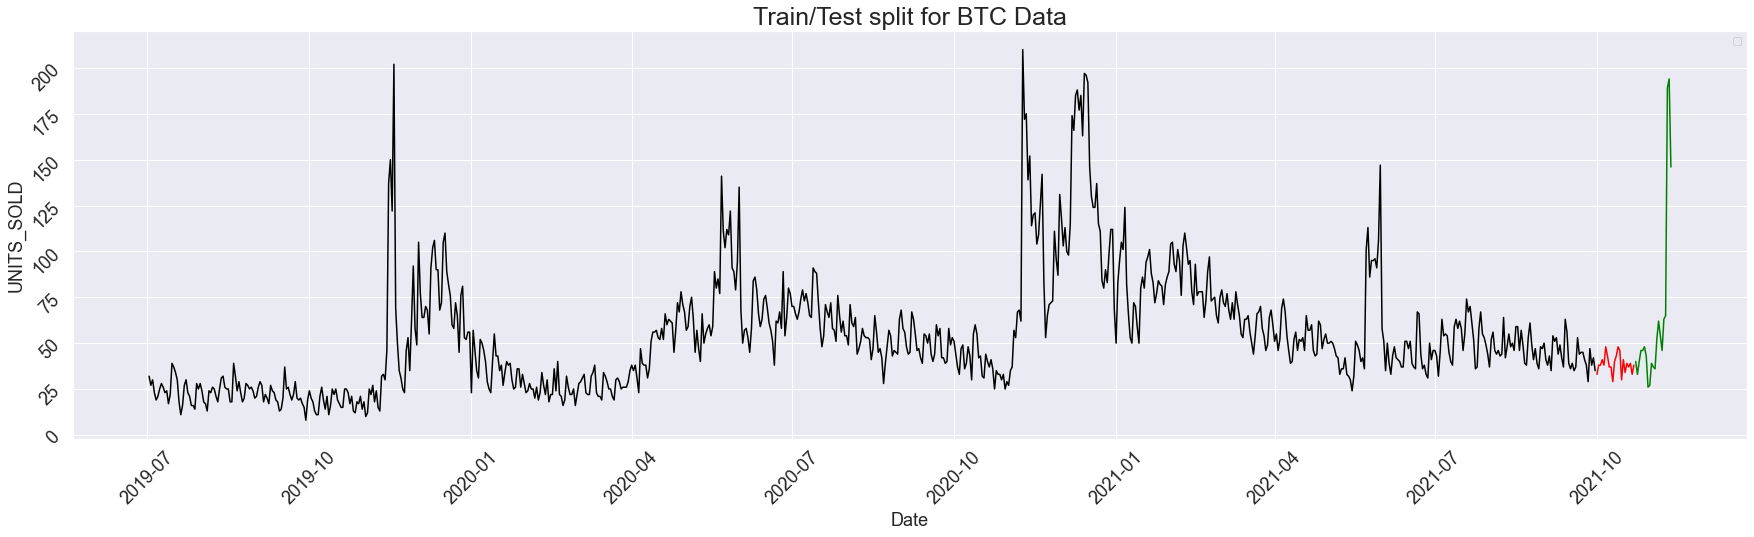

In [17]:
train = df[df.index < '2021-10-01']
test = df[(df.index >= '2021-10-01') & (df.index < '2021-10-23')]
validation = df[df.index >= '2021-10-23']
FONTSIZE = 18
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))

plt.plot(train.index, train['UNITS_SOLD'], color = "black")
plt.plot(test.index, test['UNITS_SOLD'], color = "red")
plt.plot(validation.index, validation['UNITS_SOLD'], color = "green")
plt.ylabel('UNITS_SOLD', fontsize=FONTSIZE)
plt.xlabel('Date', fontsize=FONTSIZE)
plt.xticks(rotation=45, fontsize=FONTSIZE)
plt.yticks(rotation=45, fontsize=FONTSIZE)
plt.title("Train/Test split for BTC Data", fontsize=25)
plt.legend()
plt.show()

__Autoregressive Moving Average (ARMA)__

In [22]:
y = train['UNITS_SOLD']

Para definir um modelo ARMA com a classe SARIMAX, passamos os parâmetros na seguinte ordem (1, 0 ,1)

In [23]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predições

In [24]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

Resultados

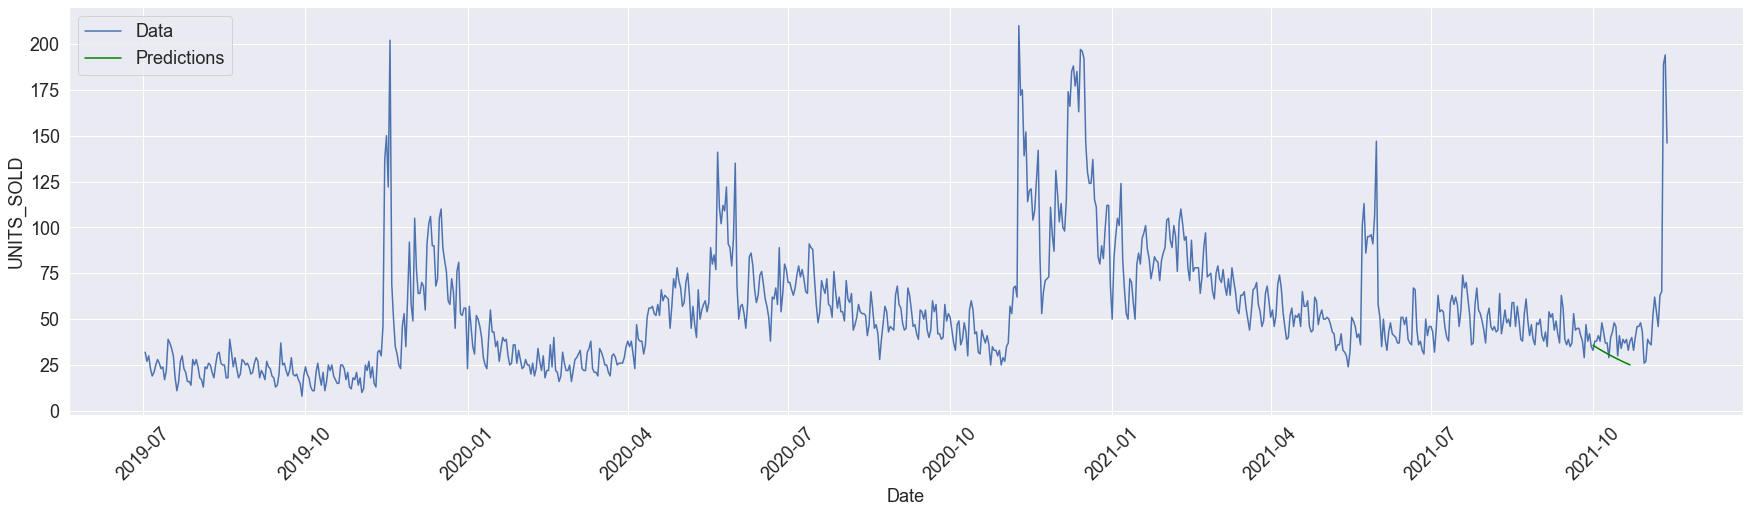

In [37]:
FONTSIZE = 18
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))
plt.ylabel('UNITS_SOLD', fontsize=FONTSIZE)
plt.xlabel('Date', fontsize=FONTSIZE)
plt.xticks(rotation=45, fontsize=FONTSIZE)
plt.yticks(rotation=0, fontsize=FONTSIZE)


plt.plot(df.index, df['UNITS_SOLD'], label = 'Data')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend(fontsize=FONTSIZE)

__Seasonal ARIMA (SARIMA)__

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Marcelo DL\OneDrive\Desktop\Elaboração de textos\Provas\mercado_livre_case\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-

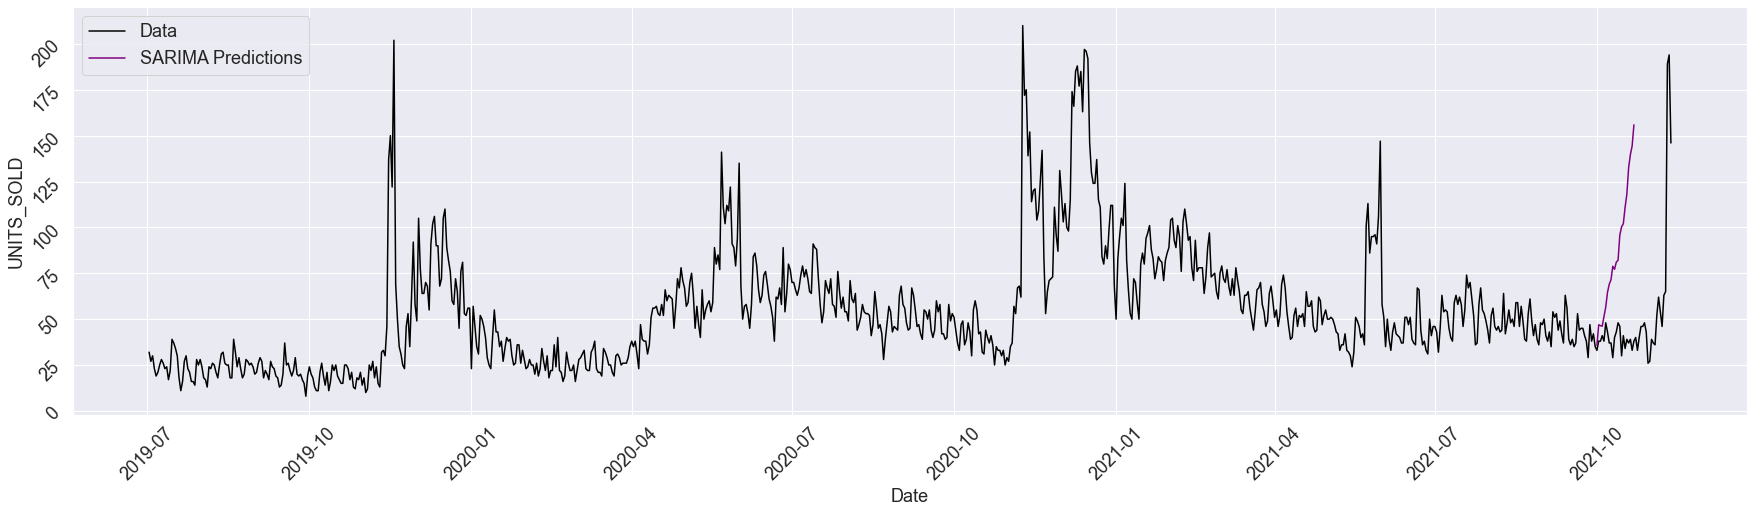

In [40]:


SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

FONTSIZE = 18
FIGSIZE = 30
plt.figure(figsize = (FIGSIZE,FIGSIZE/4))

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.ylabel('UNITS_SOLD', fontsize=FONTSIZE)
plt.xlabel('Date', fontsize=FONTSIZE)
plt.xticks(rotation=45, fontsize=FONTSIZE)
plt.yticks(rotation=45, fontsize=FONTSIZE)
plt.plot(df.index, df['UNITS_SOLD'], color = "black", label = 'Data')
plt.plot(y_pred_out, color='purple', label = 'SARIMA Predictions')

plt.legend(fontsize=FONTSIZE)